In [1]:
!pip install loguru
!pip install pycaret[full]
!pip install lxml
!pip install tsfresh

     |████████████████████████████████| 57 kB 7.2 MB/s 
     |████████████████████████████████| 261 kB 15.1 MB/s 
     |████████████████████████████████| 24.2 MB 33.0 MB/s 
     |████████████████████████████████| 2.0 MB 46.2 MB/s 
     |████████████████████████████████| 14.2 MB 39.3 MB/s 
     |████████████████████████████████| 248 kB 56.0 MB/s 
     |████████████████████████████████| 1.3 MB 51.9 MB/s 
     |████████████████████████████████| 104 kB 55.6 MB/s 
     |████████████████████████████████| 25.8 MB 49.1 MB/s 
     |████████████████████████████████| 10.5 MB 54.5 MB/s 
     |████████████████████████████████| 80 kB 15.5 MB/s 
     |████████████████████████████████| 56 kB 6.9 MB/s 
     |████████████████████████████████| 371 kB 38.9 MB/s 
     |████████████████████████████████| 81 kB 16.5 MB/s 
     |████████████████████████████████| 1.7 MB 36.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
 

In [2]:
from src.bgc_providers.ohio_bgc_provider import OhioBgcProvider
from src.bgc_providers.aida_bgc_provider import AidaBgcProvider
from src.featurizers.tsfresh import TsfreshFeaturizer

In [3]:
# from tqdm import trange
# from tsfresh import extract_features
# from tsfresh.feature_extraction import (ComprehensiveFCParameters,
# MinimalFCParameters)
# import matplotlib.pyplot as plt
# from lxml import objectify
# from datetime import datetime
#from src.helpers.dataframe import save_df, read_df

In [39]:
# experimental parameters
parameters = {
    'ohio_no' : 559,
    'scope' : 'train',
    'train_ds_size' : 3000,
    'window_size' : 6,
    'prediction_horizon' : 1,
    'minimal_features' : False,
}

def create_ds_name(parameters):
    ds_name = f"dataframes/{parameters['ohio_no']}_{parameters['scope']}_{parameters['train_ds_size']}_{parameters['window_size']}_{parameters['prediction_horizon']}.pkl"
    print(ds_name)
    return ds_name
parameters['ds_name'] = create_ds_name(parameters)

dataframes/559_train_3000_6_1.pkl


{'ohio_no': 559, 'scope': 'train', 'train_ds_size': 3000, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False, 'ds_name': 'dataframes/559_train_3000_6_1.pkl'}


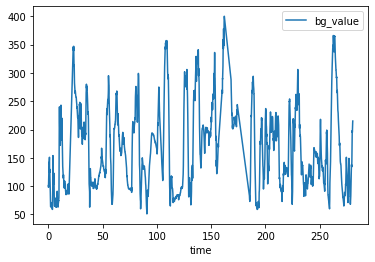

,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,...,"bg_value__matrix_profile__feature_""max""__threshold_0.98","bg_value__matrix_profile__feature_""mean""__threshold_0.98","bg_value__matrix_profile__feature_""median""__threshold_0.98","bg_value__matrix_profile__feature_""25""__threshold_0.98","bg_value__matrix_profile__feature_""75""__threshold_0.98",start,end,start_time,end_time,label
0,1.0,0.0,0.0,0.0,662.0,73694.0,6.4,5.2,1.250,108.0,...,NaN,NaN,NaN,NaN,NaN,0,5,0.00,0.42,135
1,1.0,0.0,0.0,0.0,696.0,81718.0,7.4,7.4,0.250,116.0,...,NaN,NaN,NaN,NaN,NaN,1,6,0.08,0.50,142
2,1.0,0.0,0.0,0.0,740.0,92278.0,7.6,7.6,-0.125,123.5,...,NaN,NaN,NaN,NaN,NaN,2,7,0.17,0.58,140
3,1.0,0.0,0.0,0.0,776.0,101062.0,6.4,5.6,-1.250,131.0,...,NaN,NaN,NaN,NaN,NaN,3,8,0.25,0.67,145
4,1.0,0.0,0.0,0.0,809.0,109543.0,5.8,5.0,-0.250,137.5,...,NaN,NaN,NaN,NaN,NaN,4,9,0.33,0.75,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,1.0,0.0,0.0,0.0,1073.0,194245.0,11.4,10.2,-2.625,187.0,...,NaN,NaN,NaN,NaN,NaN,2989,2994,279.68,280.10,197
2990,1.0,0.0,0.0,0.0,1126.0,212318.0,8.2,7.0,-2.000,194.5,...,NaN,NaN,NaN,NaN,NaN,2990,2995,279.77,280.18,205
2991,1.0,0.0,0.0,0.0,1169.0,228099.0,6.2,5.0,-0.750,196.0,...,NaN,NaN,NaN,NaN,NaN,2991,2996,279.85,280.27,210
2992,1.0,0.0,0.0,0.0,1199.0,239799.0,4.4,3.2,0.125,197.5,...,NaN,NaN,NaN,NaN,NaN,2992,2997,279.93,280.35,212


In [40]:
from src.helpers.dataframe import save_df, read_df
from os import path

def  create_tsfresh_dataframe(p):
    provider = OhioBgcProvider(scope = p['scope'], ohio_no=p['ohio_no'])
    print(p)
    df = provider.tsfresh_dataframe(trunc=p['train_ds_size'])
    if path.exists(p['ds_name']):
        out = read_df(p['ds_name'])
    else:    
        ts = TsfreshFeaturizer(df, p['window_size'], p['prediction_horizon'], minimal_features=p['minimal_features'])
        ts.create_labeled_dataframe()

        out = ts.labeled_dataframe
        save_df(out, p['ds_name'])
    return out

df2 = create_tsfresh_dataframe(parameters)
df2

In [14]:
from src.helpers.dataframe import save_df, read_df
df3 = df2.drop(columns=['start', 'end', 'start_time', 'end_time'])
df3

,bg_value__variance_larger_than_standard_deviation,bg_value__has_duplicate_max,bg_value__has_duplicate_min,bg_value__has_duplicate,bg_value__sum_values,bg_value__abs_energy,bg_value__mean_abs_change,bg_value__mean_change,bg_value__mean_second_derivative_central,bg_value__median,...,bg_value__permutation_entropy__dimension_6__tau_1,bg_value__permutation_entropy__dimension_7__tau_1,bg_value__query_similarity_count__query_None__threshold_0.0,"bg_value__matrix_profile__feature_""min""__threshold_0.98","bg_value__matrix_profile__feature_""max""__threshold_0.98","bg_value__matrix_profile__feature_""mean""__threshold_0.98","bg_value__matrix_profile__feature_""median""__threshold_0.98","bg_value__matrix_profile__feature_""25""__threshold_0.98","bg_value__matrix_profile__feature_""75""__threshold_0.98",label
0,1.0,0.0,0.0,0.0,662.0,73694.0,6.4,5.2,1.250,108.0,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135
1,1.0,0.0,0.0,0.0,696.0,81718.0,7.4,7.4,0.250,116.0,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142
2,1.0,0.0,0.0,0.0,740.0,92278.0,7.6,7.6,-0.125,123.5,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140
3,1.0,0.0,0.0,0.0,776.0,101062.0,6.4,5.6,-1.250,131.0,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145
4,1.0,0.0,0.0,0.0,809.0,109543.0,5.8,5.0,-0.250,137.5,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,1.0,0.0,0.0,0.0,1073.0,194245.0,11.4,10.2,-2.625,187.0,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197
2990,1.0,0.0,0.0,0.0,1126.0,212318.0,8.2,7.0,-2.000,194.5,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205
2991,1.0,0.0,0.0,0.0,1169.0,228099.0,6.2,5.0,-0.750,196.0,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210
2992,1.0,0.0,0.0,0.0,1199.0,239799.0,4.4,3.2,0.125,197.5,...,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212


In [15]:
from pycaret.regression import *
exp_reg = setup(df3, 
    target = 'label',
    feature_selection=True,
    html=False,
    silent=True    
    )

Setup Succesfully Completed!


,Description,Value
0,session_id,2724
1,Target,label
2,Original Data,"(2994, 788)"
3,Missing Values,True
4,Numeric Features,260
5,Categorical Features,527
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2095, 223)"


In [16]:
best = compare_models(exclude=['catboost', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,29.6335,39772.0133,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,5.6966,1131.4343,18.2734,0.7994,0.0919,0.0394,0.138
lr,Linear Regression,29.6335,39772.0133,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,4.9195,226.2628,12.3698,0.9586,0.0608,0.0342,0.038
lasso,Lasso Regression,5.6966,1131.4343,18.2734,0.7994,0.0919,0.0394,0.138
lr,Linear Regression,29.6335,39772.0133,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,4.9195,226.2628,12.3698,0.9586,0.0608,0.0342,0.038
en,Elastic Net,5.5975,1061.0750,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1131.4343,18.2734,0.7994,0.0919,0.0394,0.138
lr,Linear Regression,29.6335,39772.0133,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,4.9195,226.2628,12.3698,0.9586,0.0608,0.0342,0.038
en,Elastic Net,5.5975,1061.0750,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1131.4343,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2468.5781,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,39772.0133,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,52.6090,7.1792,0.9899,0.0515,0.0311,0.037
ridge,Ridge Regression,4.9195,226.2628,12.3698,0.9586,0.0608,0.0342,0.038
en,Elastic Net,5.5975,1061.0750,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1131.4343,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2468.5781,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,39772.0133,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,52.6090,7.1792,0.9899,0.0515,0.0311,0.037
ridge,Ridge Regression,4.9195,226.2628,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,305.1098,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1061.0750,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1131.4343,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2468.5781,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,39772.0133,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1.131434e+03,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2.468578e+03,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,3.977201e+04,90.1037,-6.0346,0.2339,0.2207,0.619
par,Passive Aggressive Regressor,592.7509,7.615346e+07,4960.2547,-15506.2565,0.7474,5.9944,0.058


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1.131434e+03,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2.468578e+03,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,3.977201e+04,90.1037,-6.0346,0.2339,0.2207,0.619
huber,Huber Regressor,183.1916,5.615767e+06,885.0512,-990.5484,3.7592,1.1287,0.167
par,Passive Aggressive Regressor,592.7509,7.615346e+07,4960.2547,-15506.2565,0.7474,5.9944,0.058


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1.131434e+03,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2.468578e+03,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,3.977201e+04,90.1037,-6.0346,0.2339,0.2207,0.619
huber,Huber Regressor,183.1916,5.615767e+06,885.0512,-990.5484,3.7592,1.1287,0.167
par,Passive Aggressive Regressor,592.7509,7.615346e+07,4960.2547,-15506.2565,0.7474,5.9944,0.058


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
dt,Decision Tree Regressor,7.5150,1.491684e+02,12.0967,0.9715,0.0753,0.0487,0.183
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1.131434e+03,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2.468578e+03,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,3.977201e+04,90.1037,-6.0346,0.2339,0.2207,0.619
huber,Huber Regressor,183.1916,5.615767e+06,885.0512,-990.5484,3.7592,1.1287,0.167


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
rf,Random Forest Regressor,4.7846,7.103670e+01,8.2485,0.9863,0.0527,0.0317,9.524
dt,Decision Tree Regressor,7.5150,1.491684e+02,12.0967,0.9715,0.0753,0.0487,0.183
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1.131434e+03,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2.468578e+03,49.6429,0.5281,0.3322,0.3175,0.426
lr,Linear Regression,29.6335,3.977201e+04,90.1037,-6.0346,0.2339,0.2207,0.619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
et,Extra Trees Regressor,4.4023,6.182180e+01,7.6919,0.9882,0.0483,0.0290,4.740
rf,Random Forest Regressor,4.7846,7.103670e+01,8.2485,0.9863,0.0527,0.0317,9.524
dt,Decision Tree Regressor,7.5150,1.491684e+02,12.0967,0.9715,0.0753,0.0487,0.183
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1.131434e+03,18.2734,0.7994,0.0919,0.0394,0.138
llar,Lasso Least Angle Regression,42.2261,2.468578e+03,49.6429,0.5281,0.3322,0.3175,0.426


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
et,Extra Trees Regressor,4.4023,6.182180e+01,7.6919,0.9882,0.0483,0.0290,4.740
rf,Random Forest Regressor,4.7846,7.103670e+01,8.2485,0.9863,0.0527,0.0317,9.524
dt,Decision Tree Regressor,7.5150,1.491684e+02,12.0967,0.9715,0.0753,0.0487,0.183
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ada,AdaBoost Regressor,9.8907,1.773597e+02,13.2524,0.9660,0.0985,0.0730,1.681
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139
lasso,Lasso Regression,5.6966,1.131434e+03,18.2734,0.7994,0.0919,0.0394,0.138


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
gbr,Gradient Boosting Regressor,4.6122,5.571500e+01,7.3534,0.9893,0.0466,0.0303,4.012
et,Extra Trees Regressor,4.4023,6.182180e+01,7.6919,0.9882,0.0483,0.0290,4.740
rf,Random Forest Regressor,4.7846,7.103670e+01,8.2485,0.9863,0.0527,0.0317,9.524
dt,Decision Tree Regressor,7.5150,1.491684e+02,12.0967,0.9715,0.0753,0.0487,0.183
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ada,AdaBoost Regressor,9.8907,1.773597e+02,13.2524,0.9660,0.0985,0.0730,1.681
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158
en,Elastic Net,5.5975,1.061075e+03,17.5790,0.8118,0.0827,0.0388,0.139


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
gbr,Gradient Boosting Regressor,4.6122,5.571500e+01,7.3534,0.9893,0.0466,0.0303,4.012
et,Extra Trees Regressor,4.4023,6.182180e+01,7.6919,0.9882,0.0483,0.0290,4.740
lightgbm,Light Gradient Boosting Machine,4.6099,6.704330e+01,7.9964,0.9870,0.0502,0.0302,1.140
rf,Random Forest Regressor,4.7846,7.103670e+01,8.2485,0.9863,0.0527,0.0317,9.524
dt,Decision Tree Regressor,7.5150,1.491684e+02,12.0967,0.9715,0.0753,0.0487,0.183
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ada,AdaBoost Regressor,9.8907,1.773597e+02,13.2524,0.9660,0.0985,0.0730,1.681
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,4.4564,5.260900e+01,7.1792,0.9899,0.0515,0.0311,0.037
gbr,Gradient Boosting Regressor,4.6122,5.571500e+01,7.3534,0.9893,0.0466,0.0303,4.012
et,Extra Trees Regressor,4.4023,6.182180e+01,7.6919,0.9882,0.0483,0.0290,4.740
lightgbm,Light Gradient Boosting Machine,4.6099,6.704330e+01,7.9964,0.9870,0.0502,0.0302,1.140
rf,Random Forest Regressor,4.7846,7.103670e+01,8.2485,0.9863,0.0527,0.0317,9.524
dt,Decision Tree Regressor,7.5150,1.491684e+02,12.0967,0.9715,0.0753,0.0487,0.183
knn,K Neighbors Regressor,7.7582,1.603944e+02,12.5516,0.9691,0.0847,0.0526,0.138
ada,AdaBoost Regressor,9.8907,1.773597e+02,13.2524,0.9660,0.0985,0.0730,1.681
ridge,Ridge Regression,4.9195,2.262628e+02,12.3698,0.9586,0.0608,0.0342,0.038
br,Bayesian Ridge,4.8931,3.051098e+02,13.3677,0.9445,0.0619,0.0338,0.158


In [17]:
model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4.8872,97.7101,9.8848,0.9797,0.0672,0.0336
1,4.8244,120.6140,10.9824,0.9786,0.0582,0.0309
2,3.9782,50.8124,7.1283,0.9912,0.0355,0.0239
3,4.3180,59.1423,7.6904,0.9884,0.0414,0.0266
4,3.8319,31.8988,5.6479,0.9939,0.0370,0.0253
5,4.5067,62.6143,7.9129,0.9868,0.0674,0.0344
6,4.4309,50.0485,7.0745,0.9912,0.0465,0.0293
7,3.4672,29.5730,5.4381,0.9935,0.0346,0.0230
8,5.2211,68.0252,8.2477,0.9885,0.0499,0.0318
9,4.5574,47.7790,6.9122,0.9904,0.0457,0.0309


In [18]:
pd = predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,5.5171,174.5466,13.2116,0.9665,0.0781,0.038


(<module 'matplotlib.pyplot' from '/shared-libs/python3.8/py/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 [893, 4, 1, 1, 0])

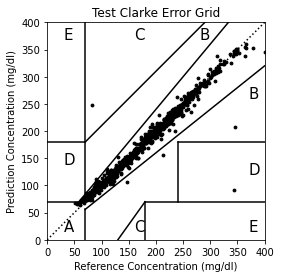

In [19]:
from src.helpers.diabetes.cega import clarke_error_grid
clarke_error_grid(pd['label'], pd['Label'], 'Test')

dataframes/559_test_100000_6_1.pkl
{'ohio_no': 559, 'scope': 'test', 'train_ds_size': 100000, 'window_size': 6, 'prediction_horizon': 1, 'minimal_features': False, 'ds_name': 'dataframes/559_test_100000_6_1.pkl'}


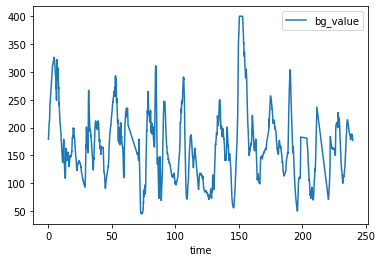

In [42]:
test_parameters = {
    'ohio_no' : 559,
    'scope' : 'test',
    'train_ds_size' : 100000,
    'window_size' : 6,
    'prediction_horizon' : 1,
    'minimal_features' : False,
}
test_parameters['ds_name'] = create_ds_name(test_parameters)
df4 = create_tsfresh_dataframe(test_parameters)
df6 = df4.drop(columns=['start', 'end', 'start_time', 'end_time'])
pd2 = predict_model(model, data=df6)

(<module 'matplotlib.pyplot' from '/shared-libs/python3.8/py/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 [2484, 13, 1, 10, 0])

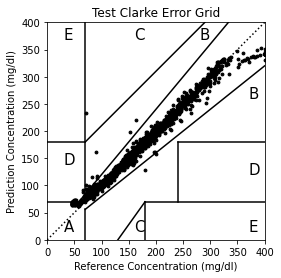

In [43]:
clarke_error_grid(pd2['label'], pd2['Label'], 'Test')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d560f233-0034-499f-bc4e-7ada8795cb9f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>